In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import statsmodels.api as sm


**Part 1:**<br>
Loading the data <br>

In [16]:
CycleHub = pd.read_csv('https://richardson.byu.edu/220/bike_sharing_data.csv')
CycleHub.head(5)

,bikes_rented,temperature,humidity,wind_speed,is_holiday
0,28.328610,68.727006,32.959305,7.851171,0
1,16.102741,97.535715,57.933066,7.409364,0
2,30.334790,86.599697,81.106209,27.187637,0
3,15.807644,79.932924,71.255742,7.486386,1
4,12.657379,57.800932,76.459280,8.158492,0


In [17]:
print(CycleHub.describe())

       bikes_rented  temperature     humidity   wind_speed   is_holiday
count   1000.000000  1000.000000  1000.000000  1000.000000  1000.000000
mean      16.907198    74.512828    55.491211    15.072172     0.491000
std       12.739693    14.606868    20.453293     8.720226     0.500169
min      -23.860167    50.231601    20.225278     0.000349     0.000000
25%        8.273381    61.798663    36.875199     7.840529     0.000000
50%       16.798373    74.840369    56.311373    15.018418     0.000000
75%       25.683677    87.215979    73.232554    22.773106     1.000000
max       56.445120    99.985884    89.958961    29.934626     1.000000


**Part 2:**<br>
Exploratory data analysis

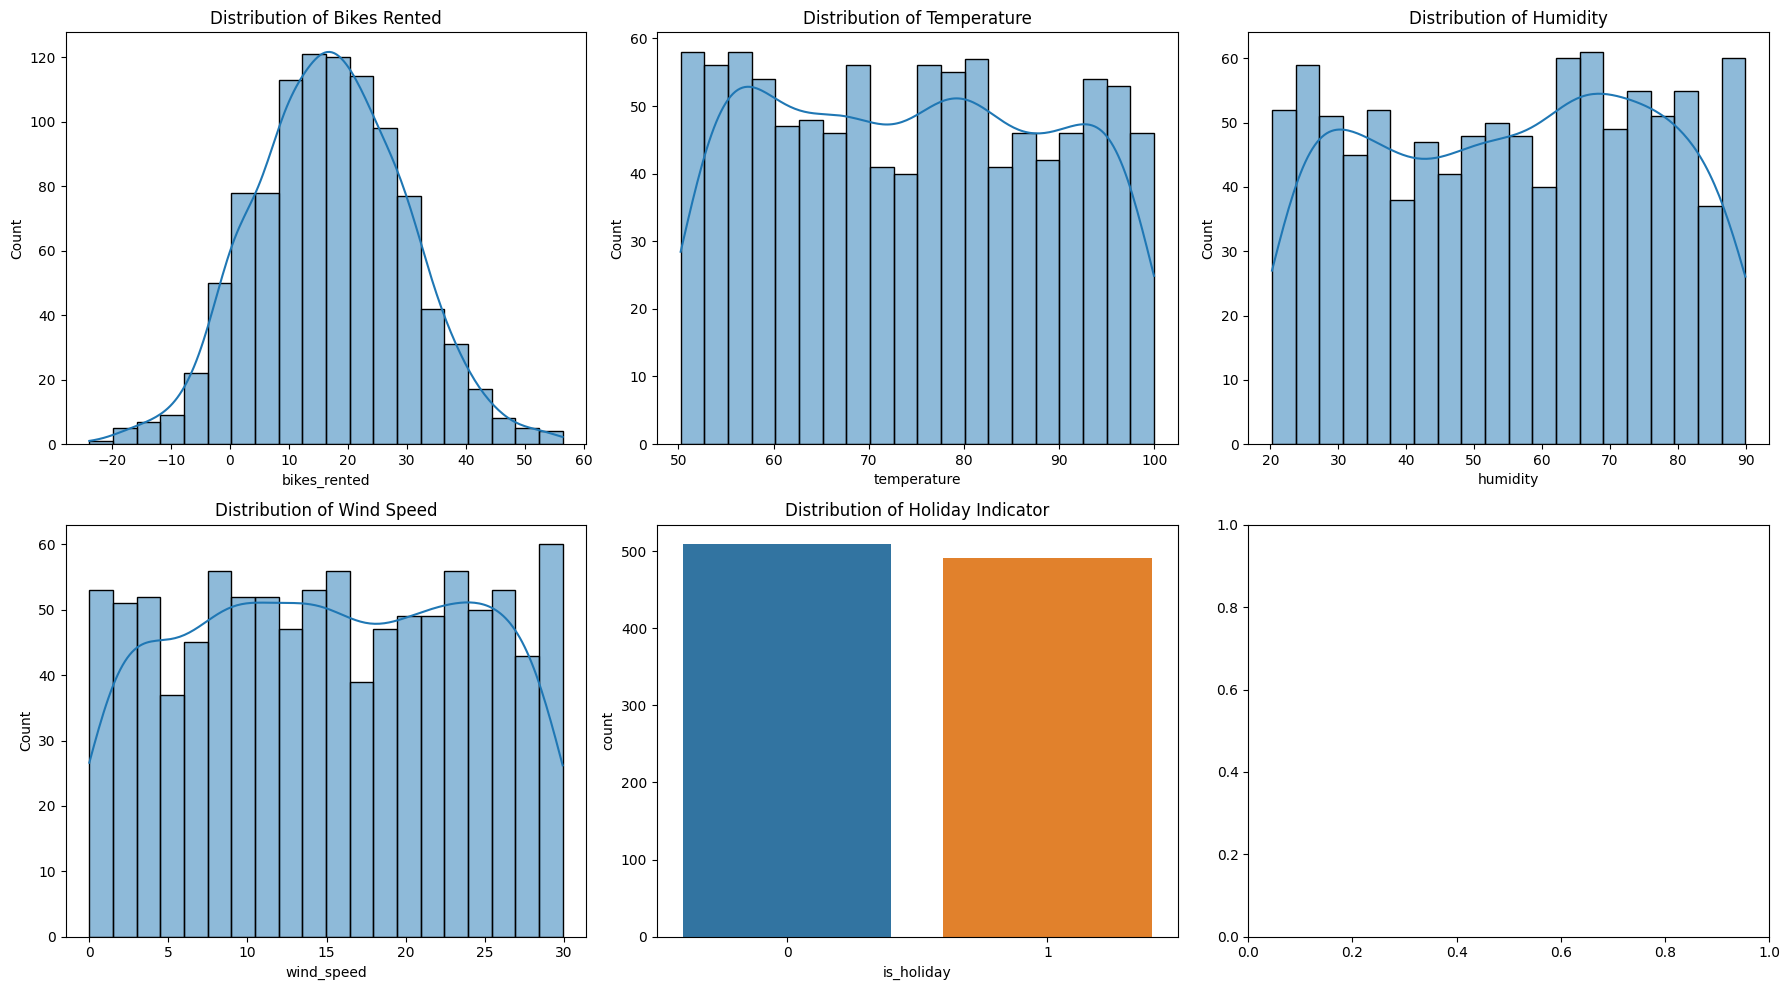

In [18]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

sns.histplot(CycleHub['bikes_rented'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Bikes Rented')

sns.histplot(CycleHub['temperature'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Temperature')

sns.histplot(CycleHub['humidity'], bins=20, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Humidity')

sns.histplot(CycleHub['wind_speed'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Wind Speed')

sns.countplot(x='is_holiday', data=CycleHub, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Holiday Indicator')

plt.tight_layout()
plt.show()

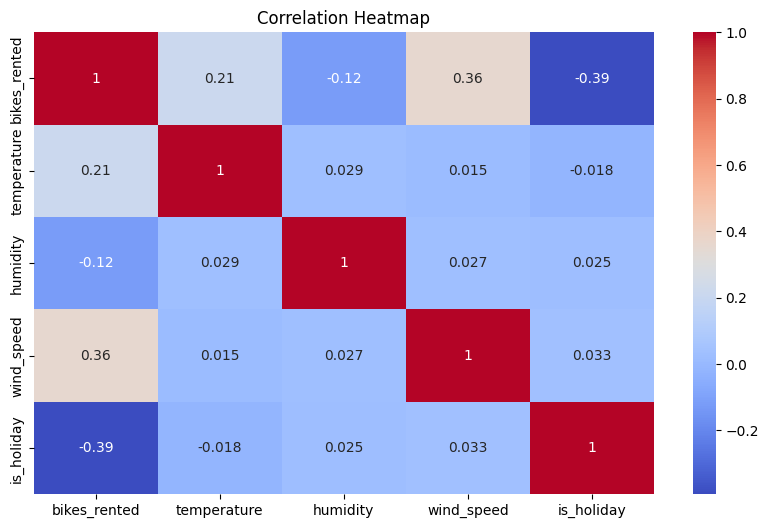

In [19]:
corr = CycleHub.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Part 3:**<br>
Perform Simple Linear Regression <br>
(A) We believe that wind speed will influence bike demand. Basedon the heatmap above

The intercept is:  9.065094459360207
The slope is:  [0.52030349]


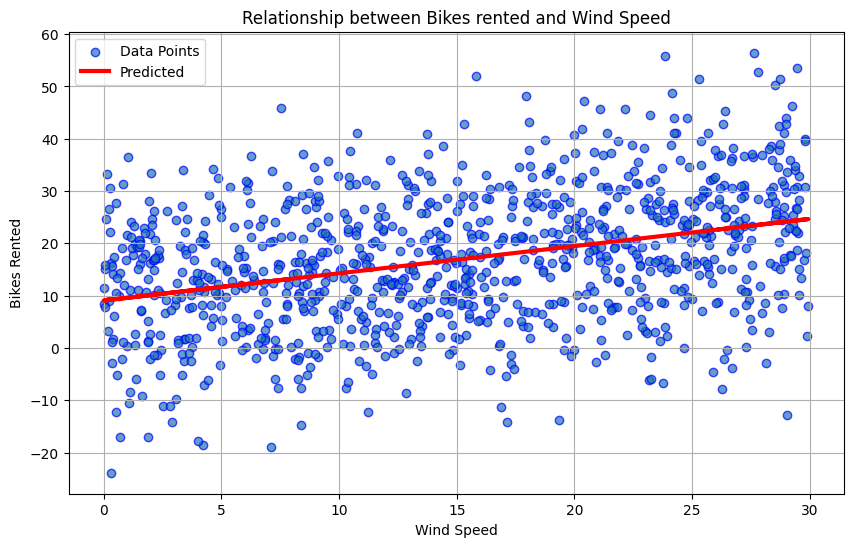

In [20]:
x = pd.DataFrame(CycleHub['wind_speed'])
y = CycleHub['bikes_rented']
model = LinearRegression()
reg_model = model.fit(x, y)
y_pred = reg_model.predict(x)

beta_0 = reg_model.intercept_
beta_1 = reg_model.coef_

plt.figure(figsize=(10, 6))
plt.scatter(x, y, label='Data Points', alpha=0.7, edgecolors='b')
plt.plot(x, y_pred, color='red', linewidth=3, label='Predicted')
plt.title('Relationship between Bikes rented and Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Bikes Rented')
plt.legend()
plt.grid(True)

print('The intercept is: ', beta_0)
print('The slope is: ', beta_1)

(B) Estimate the paramters using Ordinary Least Squares (OLS)

In [21]:
X_const = sm.add_constant(x)
model_wind = sm.OLS(y, X_const).fit()
model_summary_wind = model_wind.summary()
model_summary_wind

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           bikes_rented   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     145.0
Date:                Fri, 06 Oct 2023   Prob (F-statistic):           2.84e-31
Time:                        01:26:35   Log-Likelihood:                -3895.3
No. Observations:                1000   AIC:                             7795.
Df Residuals:                     998   BIC:                             7805.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0651      0.752     12.049      0.000       7.589      10.542
wind_speed     0.5203      0.043     12.040      0.000       0.436       0.605
==============================================================================
Omnibus:                        0.773   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.679   Jarque-Bera (JB):                0.845
Skew:                          -0.025   Prob(JB):                        0.655
Kurtosis:                       2.866   Cond. No.                         34.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(C) Interpret the coefficients

Coefficient for Wind Speed (0.520): For each one-unit increase in wind speed (1 mph), the number of bikes rented is expected to increase by 0.520<br>
Intercept (9.065): The intercept value means that when the wind speed is 0 the expected number of bikes rented would be around 9.065. This is the baseline number of bikes rented when there's no wind.

The R-squared value of 0.127 suggests that this model explains about 12.7 of the variance in bike rentals, which is a moderate amount but still leaves a lot of variability unexplained.

**Part 4:** <br>
Perform multiple linear regression <br>
(A) Add more vraiables to your model from simple linear regression <br>
(B) Estimate the new paramters

In [22]:
y = CycleHub['bikes_rented']
X_multi = CycleHub[['temperature', 'wind_speed', 'humidity', 'is_holiday']]
model = LinearRegression()
multi_model = model.fit(X_multi, y)
y_pred = multi_model.predict(X_multi)

beta_0 = multi_model.intercept_
beta_1 = multi_model.coef_[0]
beta_2 = multi_model.coef_[1]
beta_3 = multi_model.coef_[2]
beta_4 = multi_model.coef_[3]

print('The intercept is: ', beta_0)
print('The Coefficient for Temperature is: ', beta_1)
print('The Coefficient for Wind Speed is: ', beta_2)
print('The Coefficient for Humidity is: ', beta_3)
print('The Coefficient for Is holiday is: ', beta_4)


The intercept is:  4.812330380137485
The Coefficient for Temperature is:  0.17893611823359493
The Coefficient for Wind Speed is:  0.5403610131839756
The Coefficient for Humidity is:  -0.07946651370529212
The Coefficient for Is holiday is:  -10.128084360662681


(C) Interpret the significance of each variable

Temperature (0.1857): For each one-unit increase in temperature (1°F), the number of bikes rented is expected to increase by 0.1857 units <br>
Wind Speed (0.5213): For each one-unit increase in wind speed (1 mph), the number of bikes rented is expected to increase by 0.5213 units <br>
Humidity (-0.0856): For each one-unit increase in humidity (1%), the number of bikes rented is expected to decrease by 0.0856 units <br>
Intercept (-0.0359): The intercept suggests that when all the variables are zero, the number of bikes rented would be around -0.0359

**Part 5**:<br>
Implement a regression tree model:<br>
(A) Build a regression tree with the variables you found significant.<br>


We didn't use humidity because it has a low Coefficient and so it is not very important

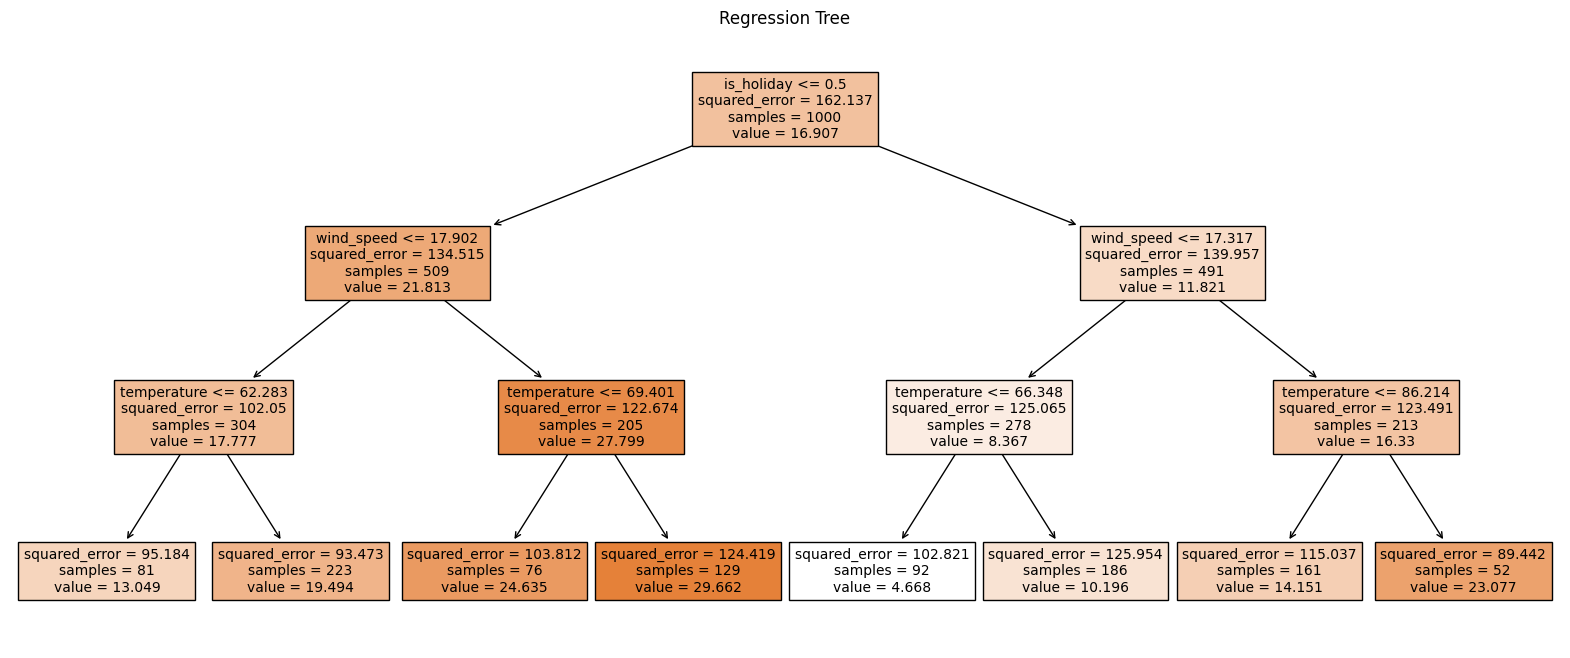

In [23]:
y = CycleHub['bikes_rented']
X_multi = CycleHub[['temperature', 'wind_speed', 'is_holiday']]
tree_model = DecisionTreeRegressor(max_depth=3)
tree_model.fit(X_multi, y)
plt.figure(figsize=(20, 8))
tree.plot_tree(tree_model, feature_names=['temperature', 'wind_speed', 'is_holiday'], filled=True, fontsize=10)
plt.title('Regression Tree')
plt.show()


(B) Interpret the tree. <br>
The tree was built using three features: 'Temperature', 'wind speed', and 'is_holiday'. The target variable is 'bikes_rented'. The tree has a maximum depth of 3, which means that it makes up to three decisions to predict the number of biked rented.<br>
The root node splits the data based on holidays (the split is on whether it is a holiday or not). The second level, the split is based on wind speed(Split data around 17mph). On the third level, the split os based on temperature. <br>
To make a prediction, we start at the root and make decsions based on the numbers in the splits until we reach the leaf node. The value at the leaf node will be the predicted number of bikes rented.

**Part 6:**<br>
Special Case Prediction: <br>

(A) Based on the weather forecast the temperature tomorrow will be 72F, the humidity will be 45%, and the wind speed will be 10 mph. Also it is not a holiday<br>
(B) Use your models to predict the number of biked that will be rented during a peak hour tomorrow <br>


In [24]:
input_data = pd.DataFrame({'temperature': [72], 'wind_speed': [10], 'humidity': [45], 'is_holiday': [0]})
input_data_no_humidity = pd.DataFrame({'temperature': [72], 'wind_speed': [10], 'is_holiday': [0]})
wind_speed = pd.DataFrame({ 'wind_speed': [10]})

# training new model on all variables
X_multi = CycleHub[['temperature', 'wind_speed', 'humidity', 'is_holiday']]
tree_model_all_var = DecisionTreeRegressor(max_depth=4)
tree_model_all_var.fit(X_multi, y)


reg_pred = reg_model.predict(wind_speed)
multi_pred = multi_model.predict(input_data)
tree_pred = tree_model.predict(input_data_no_humidity)
tree_all_var_pred = tree_model_all_var.predict(input_data)
print('Linear regression prediction - Simple:', reg_pred[0])
print('Multiple Linear regression model:', multi_pred[0])
print('Tree prediction:', tree_pred[0])
print('All variable tree prediction:', tree_all_var_pred[0])



Linear regression prediction - Simple: 14.268129337839499
Multiple Linear regression model: 19.52334790805793
Tree prediction: 19.494329547975184
All variable tree prediction: 19.944240678822602


(C) Compare the estimated values of the simple and multiple linear regression models against the regression tree with respect to the special case prediction

1. Simple Linear Regression: it predicted 14.27 bikes, which is noticeably lower than the other models. This model only used wind speed as the perdictive variable, indicating that it is not capturing the full complexity of the factors that influence bike rentals<br>
2. Multiple Linear Regression: It predicts 19.52, which is likeley more accuarte than the simple one, since it takes into account more factors that affect bike rental.<br>
3. The Decision Tree with 3 variables prediction was clode to the multiple linear model. The slight difference could be due to the nature of decision trees, which make piecewise constant predictions <br>
4. Decision Tree with all variables: Thie model predicts higher number of bikes. The inclusion of the 'humudity' could be a reason. The max depth also plays a part.<br>
-----------------------------<br>
The decisions trees and multiple linear regression models are pretty close in prediction and could be used as reliable predictors. Simple Linear regression gives a close enough prediction but lacks the accurancy rate that the other models provide, since it does not learn from all factors that affect bike rentals.

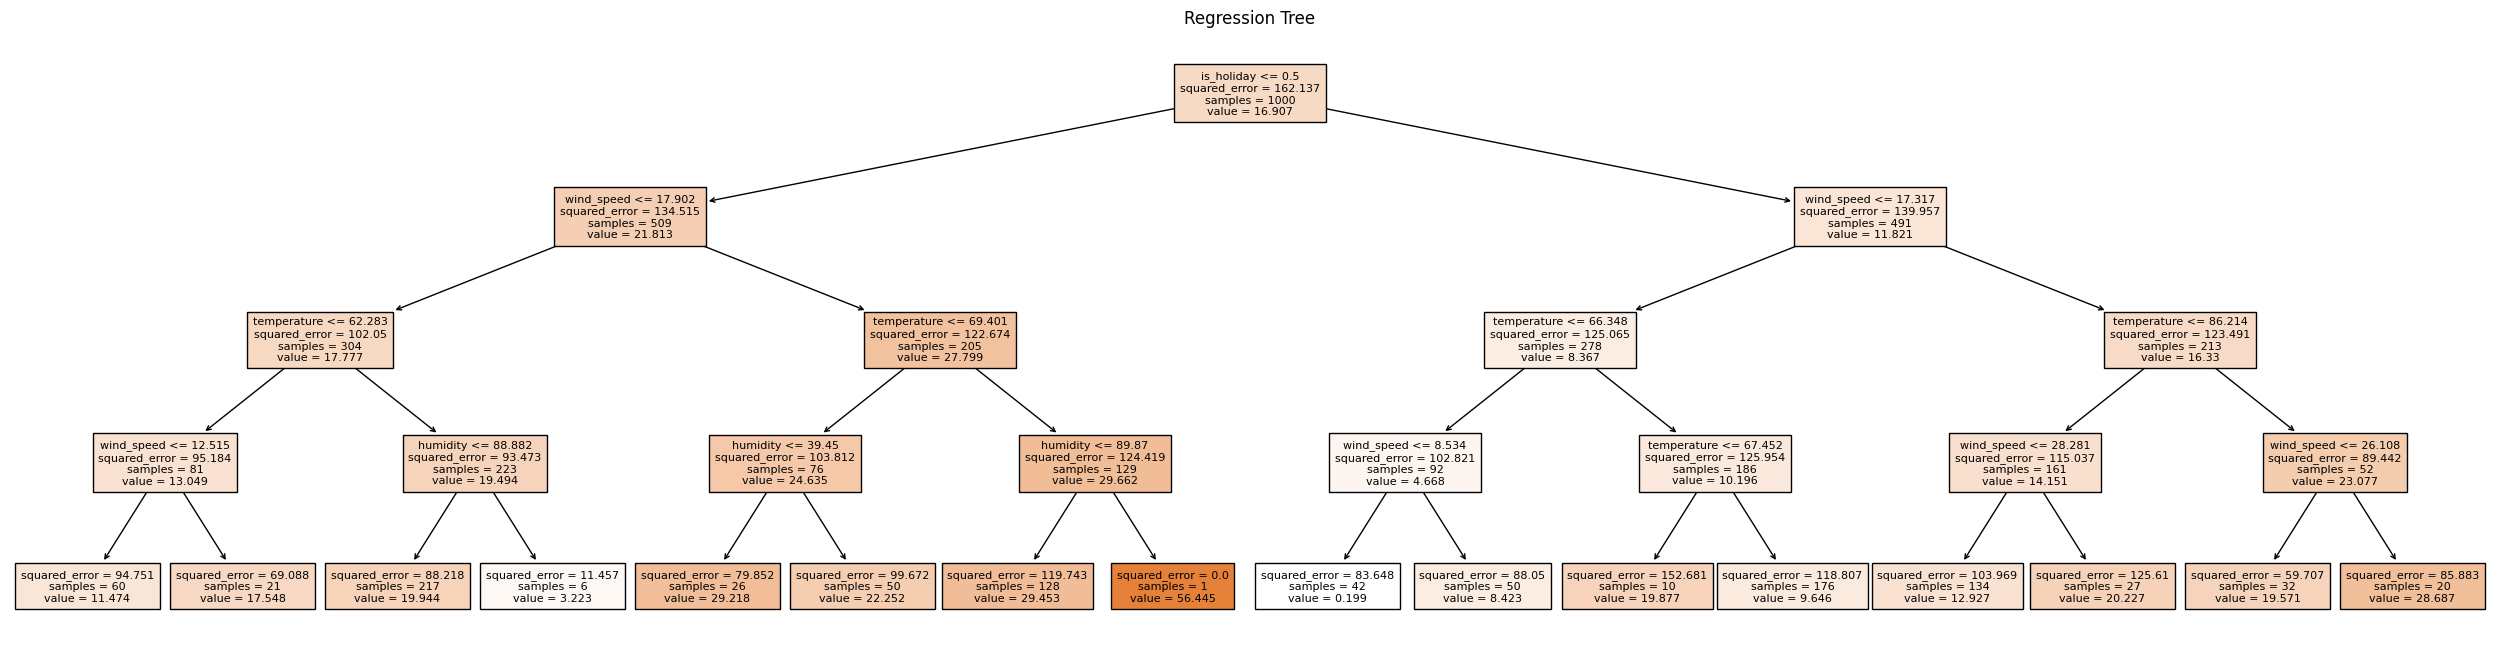

In [25]:
# plotting the tree with all 4 variables
plt.figure(figsize=(32, 8))
tree.plot_tree(tree_model_all_var, feature_names=['temperature', 'wind_speed', 'humidity','is_holiday'], filled=True, fontsize=8)
plt.title('Regression Tree')
plt.show()

**Recommendation for CycleHub:**

Forecasting Needs: <br>
1. Weather Sensitivity: Wind Speed seems to have a strong influence on bike rentals, so cycle hub need to ajust the supply of biked accordingly.<br>
2. Holdiays: Holiday seemed to be a strong key factor, people tend to rent way more bikes during holidays <br>
3. Temperature: It is not as influential as wind speed but is still worth considering. <br>

This infromation could help gurantee that enough bikes are avaiable during peak hours.<br>
On days when people rent less bikes, they could be used as bike maintaince days.<br>
-------------------<br>
Cycle Hub could also consider adding more features to the model to study their effect on rentals. This could produce more accurate predictions.

